In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Iinitial function
This is just the initial function

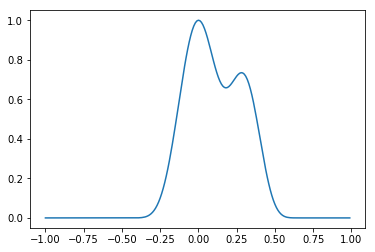

In [2]:
def case0function(x):
    return (x-0.5)**8 * (x+0.5)**8 *2**16 *0.25* (np.sign(x+0.5) + 1)*(np.sign(-x+0.5) + 1)

def case1function(x):
    y1 = (x-0.5)**8 * (x+0.5)**8 *2**16 *0.25* (np.sign(x+0.5) + 1)*(np.sign(-x+0.5) + 1)
    y2 = (x-0.7)**8 * (x+0.1)**8 * 0.7 * 2.5**16 *0.25* (np.sign(x+0.1) + 1)*(np.sign(-x+0.7) + 1)
    return y2 + y1


def case2function(x):
    y1 = (x-0.5)**8 * (x+0.5)**8 *2**16 *0.25* (np.sign(x+0.5) + 1)*(np.sign(-x+0.5) + 1)
    y2 = (x-1.2)**8 * (x-0.8)**8 * 0.7 * 5**16 *0.25* (np.sign(x-0.8) + 1)*(np.sign(-x+1.2) + 1)
    y3 = (x+2-1.2)**8 * (x+2-0.8)**8 * 0.7 * 5**16 *0.25* (np.sign(x+2-0.8) + 1)*(np.sign(-x-2+1.2) + 1)
    return y2+y3 + y1
x = np.arange(-1,1,0.01)
y = case1function(x)
plt.plot(x,y)

In [3]:
fields = ['U']
figfolder = "Plots/"
colorsat = "r"
colorpen = "b"
colorper = "g"
labelsat = "SAT"
labelpen00 = "PEN s = 0.0"
labelpen05 = "PEN s = 0.5"
labelpen1 = "PEN s = 1.0"
labelper = "PER"
extension = ".pdf"

filenamestart = ["case1_short_per", "case1_short_pen_s00", "case1_short_pen_s05", "case1_short_sat"]
colorlist = [colorper, colorpen, 'orange', colorsat]
labellist = [labelper, labelpen00, labelpen05, labelsat]

linestylelist = ["-", "-", "--", "-"]
npointslist = [400, 800, 1200, 1600, 2000]

In [4]:
initial_x = -1.0
final_x = 1.0
def f(npoints, function):
    dx = (final_x - initial_x)/npoints
    xpoints = np.array([initial_x + dx*i for i in range(0,npoints)])
    return function(xpoints)



[[], [], [], []]


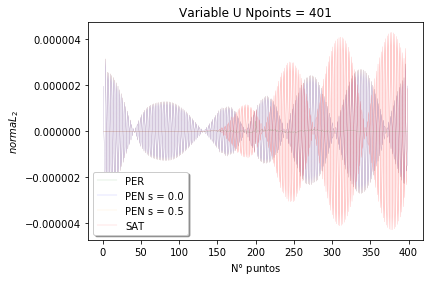

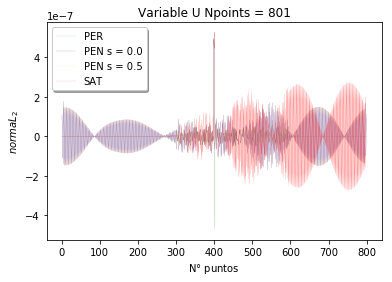

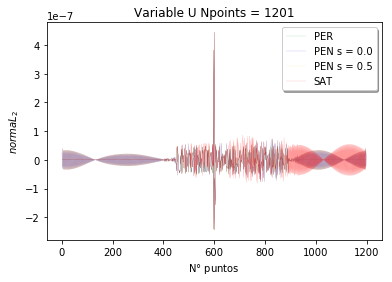

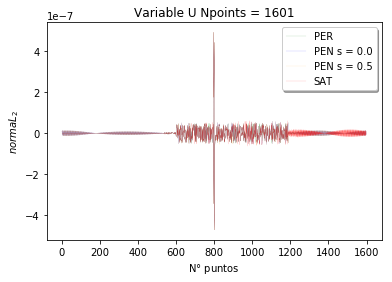

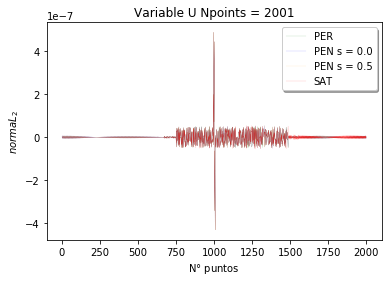

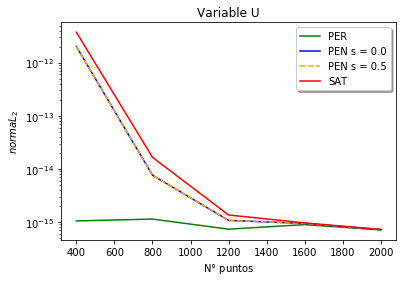

In [5]:
filenamestart = ["case1_short_per", "case1_short_pen_s00", "case1_short_pen_s05", "case1_short_sat"]
field = "U"
convergenceper = []
convergencesat = []
convergencepen_s00 = []
convergencepen_s05 = []

convergencelist = [convergenceper, convergencepen_s00, convergencepen_s05, convergencesat]
print(convergencelist)
for npoints in npointslist:
    for string, color, label, linestyle, convergence in zip(filenamestart, colorlist, labellist, linestylelist, convergencelist):
        if "per" in string:
            file = np.loadtxt("Dump/" + string + "_" + field + "_" + "{:d}".format(npoints) + ".dat", delimiter = ",")
        else:
            file = np.loadtxt("Dump/" + string + "_" + field + "_" + "{:d}".format(npoints+1) + ".dat", delimiter = ",")
        file = file.transpose()
        dataslice = file[0] 
        X = file[1]
        Y = file[2]
        X = X[dataslice == dataslice.max()]
        Y = Y[dataslice == dataslice.max()]
        if "per" in string:
            X = X[1:]
            Y = Y[1:]
        else:
            X = X[1:-1]
            Y = Y[1:-1]
        Yanalytic = f(npoints, case1function)
        error = (Y - Yanalytic[1:])
        totalerror = sum(error*error/(npoints-1))
        convergence.append(totalerror)
        plt.plot(X, error, color, label = label, linestyle = linestyle, linewidth = 0.1)
    plt.ylabel("$norma L_2$")
    plt.xlabel("$\mathrm{N°\ puntos}$")
    plt.legend(loc = "best", fancybox = True, shadow = True)
    plt.title("Variable " + field + " Npoints = {}".format(npoints+1))
    plt.savefig(figfolder + "case0_error" + "_" + field + "_npoints_{}".format(npoints+1) + extension)
    plt.show()
    
                     
for color, label, linestyle, convergence in zip(colorlist, labellist, linestylelist, convergencelist):
    plt.plot(npointslist, (convergence), color = color, label = label, linestyle = linestyle)
plt.ylabel("$norma L_2$")
plt.semilogy()
plt.xlabel("$\mathrm{N°\ puntos}$")
plt.legend(loc = "best", fancybox = True, shadow = True)
plt.title("Variable " + field)
plt.savefig(figfolder + "case1_convergence" + "_" + field + extension)
plt.show()

            
            
#file = np.loadtxt('Dump/exp_pen_d_401.dat', delimiter = ','

In [6]:
fields = ['U']
figfolder = "Plots/"
colorsat = "r"
colorpen = "b"
colorper = "g"
labelsat = "SAT"
labelpen00 = "PEN s = 0.0"
labelpen05 = "PEN s = 0.5"
labelpen1 = "PEN s = 1.0"
labelper = "PER"
extension = ".pdf"

filenamestart = ["case0_energy_per", "case0_energy_pen_s00", "case0_energy_pen_s05", "case0_energy_sat"]
colorlist = [colorper, colorpen, 'orange', colorsat]
labellist = [labelper, labelpen00, labelpen05, labelsat]

linestylelist = ["-", "-", "--", "-"]
npointslist = [400, 800, 1200, 1600, 2000]

[[], [], [], []]


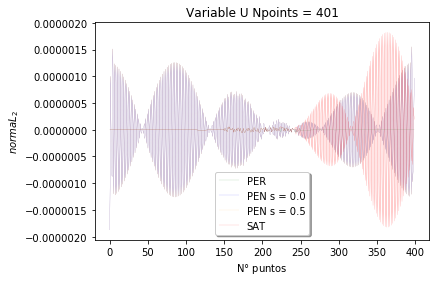

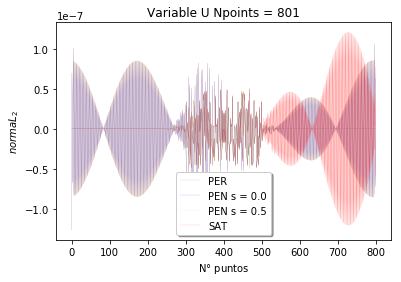

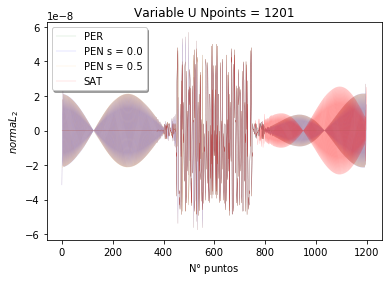

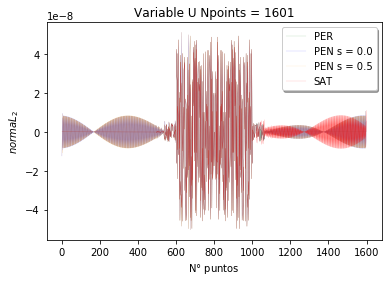

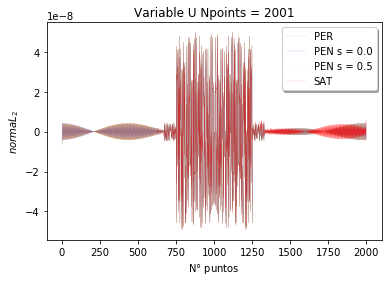

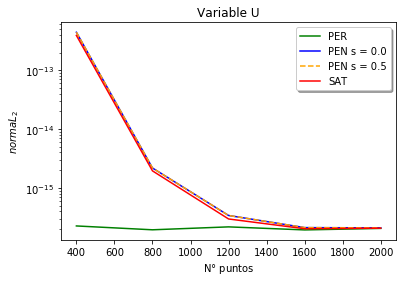

In [7]:
field = "U"
convergenceper = []
convergencesat = []
convergencepen_s00 = []
convergencepen_s05 = []

convergencelist = [convergenceper, convergencepen_s00, convergencepen_s05, convergencesat]
print(convergencelist)
for npoints in npointslist:
    for string, color, label, linestyle, convergence in zip(filenamestart, colorlist, labellist, linestylelist, convergencelist):
        if "per" in string:
            file = np.loadtxt("Dump/" + string + "_" + field + "_" + "{:d}".format(npoints) + ".dat", delimiter = ",")
        else:
            file = np.loadtxt("Dump/" + string + "_" + field + "_" + "{:d}".format(npoints+1) + ".dat", delimiter = ",")
        file = file.transpose()
        dataslice = file[0] 
        X = file[1]
        Y = file[2]
        X = X[dataslice == dataslice.max()]
        Y = Y[dataslice == dataslice.max()]
        if "per" in string:
            X = X[:]
            Y = Y[:]
        else:
            X = X[:-1]
            Y = Y[:-1]
        Yanalytic = f(npoints, case0function)
        error = (Y - Yanalytic[:])
        totalerror = sum(error*error/(npoints-1))
        convergence.append(totalerror)
        plt.plot(X, error, color, label = label, linestyle = linestyle, linewidth = 0.1)
    plt.ylabel("$norma L_2$")
    plt.xlabel("$\mathrm{N°\ puntos}$")
    plt.legend(loc = "best", fancybox = True, shadow = True)
    plt.title("Variable " + field + " Npoints = {}".format(npoints+1))
    plt.savefig(figfolder + "case1_error" + "_" + field + "_npoints_{}".format(npoints+1) + extension)
    plt.show()
    
                     
for color, label, linestyle, convergence in zip(colorlist, labellist, linestylelist, convergencelist):
    plt.plot(npointslist, (convergence), color = color, label = label, linestyle = linestyle)
plt.ylabel("$norma L_2$")
plt.semilogy()
plt.xlabel("$\mathrm{N°\ puntos}$")
plt.legend(loc = "best", fancybox = True, shadow = True)
plt.title("Variable " + field)
plt.savefig(figfolder + "case0_convergence" + "_" + field + extension)
plt.show()

            
            
#file = np.loadtxt('Dump/exp_pen_d_401.dat', delimiter = ','

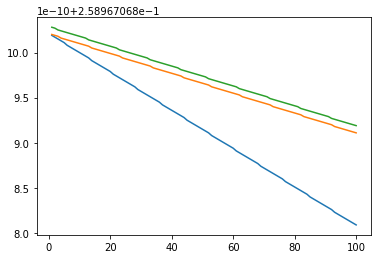

In [8]:
strings = ["Dump/case2_longrun_sat_U_1001_energy.dat", "Dump/case2_longrun_pen_s00_U_1001_energy.dat", "Dump/case2_longrun_per_U_1000_energy.dat"]

for string in strings:
    file = np.loadtxt(string)
    file = file.transpose()
    plt.plot(file[0], file[1])
    

In [9]:
file

array([[  1.        ,   2.        ,   3.        ,   4.        ,
          5.        ,   6.        ,   7.        ,   8.        ,
          9.        ,  10.        ,  11.        ,  12.        ,
         13.        ,  14.        ,  15.        ,  16.        ,
         17.        ,  18.        ,  19.        ,  20.        ,
         21.        ,  22.        ,  23.        ,  24.        ,
         25.        ,  26.        ,  27.        ,  28.        ,
         29.        ,  30.        ,  31.        ,  32.        ,
         33.        ,  34.        ,  35.        ,  36.        ,
         37.        ,  38.        ,  39.        ,  40.        ,
         41.        ,  42.        ,  43.        ,  44.        ,
         45.        ,  46.        ,  47.        ,  48.        ,
         49.        ,  50.        ,  51.        ,  52.        ,
         53.        ,  54.        ,  55.        ,  56.        ,
         57.        ,  58.        ,  59.        ,  60.        ,
         61.        ,  62.        ,  63.

In [15]:
uN = 1
u0 = 0.999
uN**3 - u0**3 - 2*uN*uN*(uN-u0)

-0.0010009989999999972